# HW06, Prof Sanchez 
## Notes
### Sean Villegas
_Main goal is to get stuck document thinking and what was the correct solution with examples_

## Flu Shot Example for creating a test statistic 
- Data: Shot A = 120, Shot B = 80, total = 200, observed percent Shot A = 60%.
- Dr. Smith: “Fair coin, P(Shot A) = 50%.”
- Dr. Jones: “Not a fair coin, not random.”
- Null: P(Shot A) = 0.5 (Dr. Smith); based on chance.
- Alternative: P(Shot A) ≠ 0.5 (Dr. Jones); not based on chance, its based on something else like datat 

**Options to choose from**
- percent of Shot A - 50.
- |percent of Shot A - 50|. # Abs 
- percent of Shot A - 60.
- |percent of Shot A - 60| # Abs
 

 **TVD Formula**
 - 1/2(|probability p| + |probability q|)
 - _gives us the distance between the two proportions, it is also the distance between the two proportions P and Q_

In [46]:
v1 = abs(211/318)
v2 = abs(107/318)
v1_v2 = v1 + v2
tvd = (v1_v2 * 0.5)
print(tvd)


0.5


**[Chapter 11.3](https://inferentialthinking.com/chapters/11/3/Decisions_and_Uncertainty.html#step-1-the-hypotheses)**

Notes:
- Hypothesis Testing (11.3): You simulate under the null to see if the observed statistic fits. P-value = proportion of simulated stats as extreme as observed.

Flu Shot Clinic Scenario: 
- Data: Shot A = 120, Shot B = 80, total = 200, observed percent = 60%. # rounded 
- Null Hypothesis: P(Shot A) = 0.6 (60%, Dr. Smith says it’s a coin with P = 0.6).
- Alternative Hypothesis: P(Shot A) ≠ 0.6 (Dr. Jones says it’s not random).
- Test Statistic: | percent of Shot A - 60 |
- Observed Statistic: 60 - 60 = 0 (real data value).

**Objective** 
- Simulate the test statistic to perform the hypothesis test (e.g., find a p-value).
    - **This is how hypothesis tests work in Data 8 (Chapter 11.3)—simulate under null to get a p-value.**
<center>Question: What assumption do we need to make to run this simulation?</center>

In [27]:
from datascience import * 
import numpy as np 

testing_number = 1000
simulations = make_array() 

for i in range(testing_number):
    sample = sample_proportions(200, [3/5, 2/5]) # sample_proportions(<sample size>, [probabilities])
    percent = sample.item(0) * 100  # why are we multiplying by 100
    print(percent)
    stat = percent - 60 
    simulations = np.append(simulations, stat)
print(simulations[:5])



"""
You are multiplying by 100 because sample.item(0) represents a proportion (a value between 0 and 1),
and you want to express it as a percentage.
"""


55.50000000000001
64.0
57.99999999999999
56.00000000000001
65.5
61.5
62.0
61.0
64.5
62.0
58.5
54.50000000000001
62.5
57.49999999999999
56.00000000000001
52.0
60.5
55.00000000000001
62.5
57.99999999999999
66.5
55.00000000000001
57.49999999999999
59.5
53.5
58.5
56.49999999999999
62.5
56.49999999999999
63.5
63.0
62.5
55.00000000000001
58.5
59.5
54.50000000000001
56.00000000000001
61.0
55.50000000000001
62.5
61.0
63.0
56.99999999999999
64.5
66.5
62.0
62.0
56.00000000000001
56.00000000000001
62.0
66.0
64.0
56.49999999999999
53.0
60.5
58.5
59.5
64.5
60.5
60.5
54.50000000000001
60.5
64.0
59.0
60.0
65.0
60.5
57.99999999999999
59.5
63.5
59.0
56.00000000000001
56.99999999999999
67.0
63.0
59.5
55.00000000000001
60.0
60.0
63.5
61.5
63.0
62.0
63.5
60.0
53.5
56.00000000000001
60.0
59.5
60.0
64.5
65.0
55.00000000000001
60.5
53.5
56.99999999999999
59.5
59.0
64.5
59.0
56.49999999999999
59.0
62.5
56.99999999999999
54.50000000000001
64.5
57.99999999999999
55.50000000000001
57.99999999999999
55.5000000000

'\nYou are multiplying by 100 because sample.item(0) represents a proportion (a value between 0 and 1),\nand you want to express it as a percentage.\n'

**Question** 


Question 2.7. Simulate 10,000 values of the test statistic 

Use as many lines of code as you need. We have included the code that visualizes the distribution of the simulated values. The red dot represents the observed statistic you found in Question 2.5.

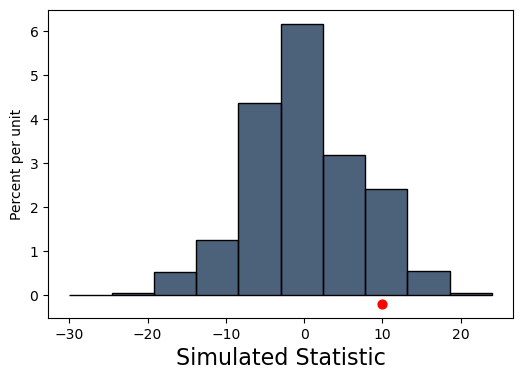

In [28]:
"""Incorrect code 
import ploty as plt 

observed_statistic = ...
def one_simulated_statistic():    
    simulated_statistics = make_array()
    num_simulations = 10000

    for i in range(num_simulations):
        sample = sample_proportions(sample_size, percent_V1)
        percent = sample.item(0) * 100 # percent is calculated here
        simulated_statistics = np.append(simulated_statistics, percent)
    return one_simulated_statistics

"""

%matplotlib inline
from datascience import *
import numpy as np
import matplotlib.pyplot as plt

def one_simulated_statistic():
    sample_size = 50
    null_probs = [0.5, 0.5]
    sample = sample_proportions(sample_size, null_probs)
    percent = sample.item(0) * 100
    return percent - 50

simulated_statistics = make_array()
num_simulations = 10000
for i in range(num_simulations):
    stat = one_simulated_statistic()
    simulated_statistics = np.append(simulated_statistics, stat)

# Plot
Table().with_columns('Simulated Statistic', simulated_statistics).hist()
plt.scatter(10, -0.002, color='red', s=40)  # Observed stat = 10
plt.show()


**11.3.7 Conventional Cut-Offs and P Value**
notes:
*Trials is the amount of times it is tested* 
- If you don’t want to use your own judgment, use np.count_nonzero(distances >= different_observed_statistic) / trials 
- np.count_nonzero() function counts how many values in an array satisfy a certain condition
`p_value = np.count_nonzero(simulations >= observed_test_statistic) / testing_number` # simulations is an array

The conventions are based on the area in the tail, starting at the observed statistic (the red dot) and looking in the direction that makes us lean toward the alternative. In this example that’s the right side, because big distances favor the alternative which says that the model isn’t good.

**<center>if the area of the tail is small, the observed statistic is far away from the values most commonly predicted by the null hypothesis.</center>**

- Remember that in a histogram, area represents percent. To find the area in the tail, we have to find the percent of distances that were greater than or equal to 3.2, where the red dot is. The array distances contains the averages for all 10,000 repetitions of random sampling under Mendel’s model, and different_observed_statistic is 3.2.

**[11. 2 Total Variation Distance](https://inferentialthinking.com/chapters/11/2/Multiple_Categories.html#a-new-statistic-the-distance-between-two-distributions)** 

notes: 
- where() doesn’t extract values—use .column() instead

In [29]:
#### Code for calculating TVD 

def total_variation_distance(distribution_1, distribution_2):
    """The function total_variation_distance takes two arrays containing the distributions to compare, and returns the TVD between them."""
    return sum(np.abs(distribution_1 - distribution_2)) / 2

# Simulate one simulated value of 
# the total variation distance between
# the distribution of a sample selected at random
# and the distribution of the eligible population

def one_simulated_tvd():
    sample_distribution = sample_proportions(1453, eligible_population)
    return total_variation_distance(sample_distribution, eligible_population)   


**<center>Putting into practice</center>**

In [ ]:
from datascience import *
import numpy as np

null_distribution = make_array(1/6, 1/6, 1/6, 1/6, 1/6, 1/6)
print(null_distribution)  # [0.1667, 0.1667, ...]

def calculate_tvd(null_dist, obs_dist):
    return sum(np.abs(null_dist - obs_dist)) / 2

# Observed data from a table (imagine a column 'Counts')
die_table = Table().with_columns('Counts', [1200, 1100, 950, 900, 850, 1000])
obs_dist = die_table.column('Counts') / 6000 # get proportions from tables array ## column lets you extract the data 
calculate_tvd(null_distribution, obs_dist)

observed_total_variation_distance = 0.050000000000000003

[ 0.16666667  0.16666667  0.16666667  0.16666667  0.16666667  0.16666667]


**Create an array called simulated_tvds that contains 10,000 simulated values under the null hypothesis. Assume that the original sample consisted of 1,000 individuals.** 

notes: 
- you need to make an empty array
- use sample_proportions
- create a for loop with range(10000) simulated values, sample_size consists of 1000

In [30]:
simulated_tvds = make_array()

for i in range(10000): 
    sample = sample_proportions(1000, null_distribution)
    tvd = calculate_tvd(sample, null_distribution) 
    simulated_tvds = np.append(simulated_tvds, tvd) 
    
print(simulated_tvds[:5]) # different output: print(simulated_tvds[:5])

[ 0.03133333  0.02833333  0.04933333  0.02833333  0.009     ]


In [ ]:
job_pref = Table().with_columns(
    'Preference', ['SE', 'OSNT', 'SE', 'OSNT', 'SE', 'OSNT'], # count of 3 SE, and 3 OSNT 
    'Gender', ['male', 'female', 'female', 'male', 'female', 'female']
)

se_job_preference = job_pref.group('Preference').where('Preference', 'SE').column('count').item(0)
print(se_job_preference)

3


Question: **The data scientists want to use the data to test whether males are older than females. One of the following statements is their null hypothesis and another is their alternative hypothesis. Assign null_statement_number and alternative_statement_number to the numbers of the correct statements in the code cell below.**

Options:
1. In the sample, the males and females have the same distribution of ages; the sample averages of the two groups are different due to chance.
    - This is evaluating a sample, not applying to the population. Thus it is not correct option
2. In the population, the males and females have the same distribution of ages; the sample averages of the two groups are different due to chance.
    - This statement is a correct null hypothesis, that we want to prove wrong
3. The age distributions of males and females in the population are different due to chance.
    - This is not stating the purpose of the test, False
4. The males in the sample are older than the females, on average.
    - Sample, not population --> False
5. The males in the population are older than the females, on average.
    - Correct statement for alternative hypothesis 
6. The average ages of the males and females in the population are different.
    - Incorrect statement because thats not what we are testing for 

Question: 
- _**Is there formality, where the null must be what we are trying to prove wrong, and the alternative is what we are testing for in the data**_

    Null: 
    - Definition: The null is the "default" or "no effect" statement—typically what you’re trying to disprove or reject. It assumes no difference, no relationship, or equality in the population, with any observed differences in the sample attributed to random chance.
        - Role: It’s the baseline you test against. You aim to gather evidence to reject it (or fail to reject it).

    Alternative: 
    - Definition: The alternative is what you’re testing for—the claim of a difference, effect, or relationship in the population. It’s what you suspect or hope the data supports.



Question: **The data scientists have decided to use a permutation test. Assign permutation_test_reason to the number corresponding to the reason they made this choice. (4 points)
1. Since a person's age shouldn't be related to their gender, it doesn't matter who is labeled "male" and who is labeled "female", so you can use permutations.
2. Under the null hypothesis, permuting the labels in the sampled_ages table is equivalent to drawing a new random sample with the same number of males and females as in the original sample.
3. Under the null hypothesis, permuting the rows of sampled_ages table is equivalent to drawing a new random sample with the same number of males and females as in the original sample.**

notes: 
- [Reading](https://inferentialthinking.com/chapters/12/1/AB_Testing.html#permutation-test)
- [Final Review](https://www.data8.org/data8assets/exam/stats_final_review.pdf)
- To determine if two samples come from the same underlying distribution. Or, to see if
the distribution of some feature/attribute for one class is the same as the distribution of the
feature/attribute for another class (in the population). These questions are answered by
permutation tests:
    - A permutation test shuffles your data randomly to see if the difference you observe (e.g., males older than females) could happen by chance. It’s like mixing up names in a hat and checking if the result still looks special.



Question: **Question 4.4. The data scientists have decided to use a permutation test. Assign permutation_test_reason to the number corresponding to the reason they made this choice. (4 points)**

1. Since a person's age shouldn't be related to their gender, it doesn't matter who is labeled "male" and who is labeled "female", so you can use permutations.
    - You are supposed to change the labels, BUT, it need sto be the same number of labels for it to be the same test
2. Under the null hypothesis, permuting the labels in the sampled_ages table is equivalent to drawing a new random sample with the same number of males and females as in the original sample.
    - This is the correct option because we use the same number of males/females, but switch the labeling
3. Under the null hypothesis, permuting the rows of sampled_ages table is equivalent to drawing a new random sample with the same number of males and females as in the original sample.
    - This changes the rows values, which is an entirely different test with a different outcome, thus is not correct

**Question 4.6. Complete the cell below so that observed_statistic_ab evaluates to the observed value of the data scientists' test statistic. Use as many lines of code as you need, and remember that you can use any quantity, table, or array that you created earlier. (4 points)**

In [ ]:
"""
Full table:
Gender | Age mean
female | 42.0692
male   | 43.3833

Row values:
 ['female' 'male'] 

 Age Mean Row: 
[ 42.06923077  43.38333333]

import numpy as np 

group_mean_tbl = sampled_ages.group('Gender', np.mean)

print(f'Full table:\n{group_mean_tbl}\n\nRow values/labels:\n {group_mean_tbl[0]} \n\n Age Mean Row: \n{group_mean_tbl[1]}')


print(f'Female mean: {group_mean_tbl[1].item(0)}')
print(f'Male mean: {group_mean_tbl[1].item(1)}')


group_means = group_mean_tbl.column('Age mean')      # array of mean ages
avg_male_vs_female = group_means[0] > group_means[1]
print(f'\nEvaluates to: {avg_male_vs_female}')

"""

from datascience import *

pet_ages = Table().with_columns(
    'Preference', ['cat', 'dog', 'cat', 'dog', 'cat'],
    'Age', [5, 3, 2, 7, 4]
)

pet_ages.show()

cat_ages = pet_ages.where('Preference', 'cat').column('Age')
dog_ages = pet_ages.where('Preference', 'dog').column('Age')
observed_statistic_ab = dog_ages.mean() - cat_ages.mean()
print(observed_statistic_ab)  # Output: 1.0 (5 - 4)

Preference,Age
cat,5
dog,3
cat,2
dog,7
cat,4


1.33333333333


**Shuffled Labels Section**

```
shuffled_labels = smoking_and_birthweight.sample(with_replacement = False).column(0)
original_and_shuffled = smoking_and_birthweight.with_column('Shuffled Label', shuffled_labels)

```
What it does:
- **Return a new table where k rows are randomly sampled from the original table**

In [45]:
shuffled_labels = pet_ages.sample(with_replacement = False).column(0) 
print(shuffled_labels)
"""
Arguments: 

k -- specifies the number of rows (int) to be sampled from the table. Default is k equal to number of rows in the table.

with_replacement -- (bool) By default True; usually set to False 
"""


['dog' 'cat' 'dog' 'cat' 'cat']


'\nArguments: \n\nk -- specifies the number of rows (int) to be sampled from the table. Default is k equal to number of rows in the table.\n\nwith_replacement -- (bool) By default True; usually set to False \n'

In [ ]:
def one_simulated_statistic():    
    null_probs = [0.6635220125786163, 0.33647798742138363] # sums to 1 
    sample = sample_proportions(sample_size, null_probs)
    percent = sample.item(0) * 100 # percent is calculated here before subtraction 
    stat = percent - 60
    return stat 

simulated_statistics = make_array()
num_simulations = 10000

for i in range(num_simulations): 
    stat = one_simulated_statistic()
    simulated_statistics = np.append(simulated_statistics, stat) 

def one_simulated_difference_of_means():
    """Returns: Difference between mean birthweights
    of babies of smokers and non-smokers after shuffling labels"""
    
    # array of shuffled labels
    shuffled_labels = births.sample(with_replacement=False).column('Maternal Smoker')
    
    # table of birth weights and shuffled labels
    shuffled_table = births.select('Birth Weight').with_column(
        'Shuffled Label', shuffled_labels)
    
    return difference_of_means(shuffled_table, 'Shuffled Label')   

def difference_of_means(table, group_label):
    """Takes: name of table,
    column label that indicates the group to which the row belongs
    Returns: Difference of mean birth weights of the two groups"""
    reduced = table.select('Birth Weight', group_label)
    means_table = reduced.group(group_label, np.average)
    means = means_table.column(1)
    return means.item(1) - means.item(0)


difference_of_means(births, 'Maternal Smoker')


female_mean = group_mean_tbl[1].item(0)
male_mean = group_mean_tbl[1].item(1)
observed_statistic_ab = male_mean - female_mean
observed_statistic_ab


### correct example
from datascience import *

pet_ages = Table().with_columns(
    'Preference', ['cat', 'dog', 'cat', 'dog', 'cat'],
    'Age', [5, 3, 2, 7, 4]
)

def simulate_one_statistic():
    "Returns one simulated dog mean - cat mean"
    shuffled_labels = pet_ages.sample(with_replacement=False).column('Preference')  # Shuffle labels
    shuffled_tbl = pet_ages.with_columns('Preference', shuffled_labels)  # Keep original ages
    cat_mean = shuffled_tbl.where('Preference', 'cat').column('Age').mean()
    dog_mean = shuffled_tbl.where('Preference', 'dog').column('Age').mean()
    return dog_mean - cat_mean

print(simulate_one_statistic())  # E.g., -0.5, 1.0, etc. 


differences = make_array()

repetitions = 5000
for i in np.arange(repetitions):
    new_difference = one_simulated_difference_of_means()
    differences = np.append(differences, new_difference)  


Question: **Question 4.10. Complete the cell to simulate 5,000 values of the statistic. We have included the code that draws the empirical distribution of the statistic and shows the value of observed_statistic_ab from Question 3.6. Feel free to use as many lines of code as you need. (3 points)**



In [ ]:
## example from textbook 12.1

simulated_statistics_ab = make_array()
reps = 5000
for i in np.arange(reps): 
    new_diff = simulate_one_statistic() 
    simulated_statistics_ab = np.append(simulated_statistics_ab, new_diff)

# Do not change these lines
Table().with_columns('Simulated Statistic', simulated_statistics_ab).hist()
plt.scatter(observed_statistic_ab, -0.002, color='red', s=70);

Question**Question 4.11. Use the simulation to find an empirical approximation to the p-value. Assign p_val to the appropriate p-value from this simulation. Then, assign conclusion to either null_hyp or alt_hyp**

In [ ]:
p_val = np.count_nonzero(simulated_statistics_ab >= observed_statistic_ab) / 5000

### always remember that np.count_nonzero is used to simulate p_val with array of simulated values, greater than or equal to the observed test statistic 